# TRAFFIC ANALYSIS PROJECT
## BY: Group 5
1. Kevin Muchori
2. Benson Kamau
3. Sally Kinyanjui
4. Breden Mugambi
5. Nancy Chelangat

## Overview:  
The urban mobility and transportation sector are vital for the functioning of modern cities, enabling the movement of people and goods efficiently. Within this industry, traffic management and pedestrian safety are crucial components that directly impact the quality of life in urban areas. Effective traffic pattern analysis and prediction can help mitigate congestion, enhance safety, and improve overall urban mobility.
Well managed traffic leads to minimized economic losses, improved quality of life especially on the side of pedestrians.

## Challenges:
There are so many problems that are encountered especially in most urban towns whose vehicle and pedestrian population continues to grow every day. One of the problems is the traffic congestion which leads to higher traffic volumes which in turn brings about economic losses due to wasted time and fuel, increased pollution. Another key challenge is the pedestrian safety where High pedestrian traffic in urban areas increases the risk of accidents.  A challenge to also note is collecting accurate and real-time data from various sources is challenging which would make accurate traffic and pedestrian predictions challenging.

## Proposed solutions:
To solve some of these challenges would include measures such as advocating for sustainable urban mobility policies and invest in supportive infrastructure.  Use of Use machine learning models to analyze and predict traffic patterns and pedestrian crossings at different times of the day. In order to gather real-time data on traffic and pedestrian movement would require use of high technology like IoT devices.

## Conclusion:
The analysis and prediction of traffic congestion levels and pedestrian crossings are essential for enhancing urban mobility and safety. Successful implementation of these solutions can lead to reduced congestion, fewer accidents, and an overall improvement in the quality of urban life.


## Problem Statement:

Urban areas continue to face significant challenges in managing their traffic congestion and ensuring pedestrian safety. The changing nature of these areas together with the increasing volume of both vehicle and pedestrian traffic, makes it hard for one to predict traffic patterns affectively.

## Objective :
Our primary objective is to create an accurate time series model(s) that can model, analyze and predict traffic congestion levels and pedestrian crossings at different times of the day.

### Specific objectives:
1.  To identify key factors that influence traffic and pedestrian movement
2.  To develop predictive models for forecasting future traffic congestion and pedestrian crossing patterns.
3.  To provide recommendations for urban planners and traffic management authorities to improve traffic flow and pedestrian safety.


## Data Understanding
The data to use in this study is sourced from the UC Irvine Machine Learning Repository.  It has 4760 rows and 14 data features.

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

Explaining the function below:

load_and_get_info()
This function loads a CSV file into a Pandas DataFrame, displays the first few rows, and provides information about the DataFrame's structure. If there's an issue with the file's encoding, it attempts to load the file using an alternative encoding.

check_data_types()
This function checks the data types of columns in a DataFrame and returns a count of how many columns belong to each data type category.

In [3]:
def load_and_get_info(file_path, encoding='utf-8'):
    try :
        # Load data
        df = pd.read_csv(file_path, encoding=encoding)

        # Display the first few rows of the DataFrame
        df_head = df.head()

        # Get information about the DataFrame
        df_info = df.info()

        return df,df_info, df_head
    except UnicodeDecodeError:
        print(f"Failed to decode {file_path} with encoding {encoding}. Trying with 'latin1' encoding.")
        return load_and_get_info(file_path, encoding='latin1')

# A function that checks the data types of DataFrame columns and return the count of columns for each data type category.
def check_data_types(df):

    data_type_counts = df.dtypes.replace({'object': 'string'}).value_counts().to_dict()
    return data_type_counts

In [5]:
file_path = '/content/traffic_data1 (1).csv'
df1,data_info, data_head = load_and_get_info(file_path)
print(data_info)
print("\nFirst few rows of the DataFrame:")
data_head #data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   oid                4759 non-null   object 
 1   timestamp          4759 non-null   object 
 2   date               4759 non-null   object 
 3   hour               4759 non-null   int64  
 4   x                  4759 non-null   float64
 5   y                  4759 non-null   float64
 6   vehicle_count      4759 non-null   int64  
 7   pedestrian_count   4759 non-null   int64  
 8   congestion_level   4759 non-null   object 
 9   weather_condition  4759 non-null   object 
 10  temperature        4759 non-null   float64
 11  location           4759 non-null   object 
 12  other_oid          4759 non-null   object 
 13  other_class        4759 non-null   object 
 14  other_x            4759 non-null   object 
 15  other_y            4759 non-null   object 
 16  body_roll          0 non

,oid,timestamp,date,hour,x,y,vehicle_count,pedestrian_count,congestion_level,weather_condition,...,other_oid,other_class,other_x,other_y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,oid_0,2023-01-01 00:00:00,2023-01-01,0,76.330009,37.469175,17,7,low,snowy,...,"['oid_284', 'oid_111', 'oid_354', 'oid_403', '...","['vehicle', 'pedestrian', 'cyclist', 'cyclist'...","[80.16643167796968, 23.193568120739716, 99.294...","[10.968289671858821, 54.31625209147144, 12.196...",NaN,NaN,NaN,NaN,NaN,NaN
1,oid_1,2023-01-01 01:00:00,2023-01-01,1,6.867522,42.072927,3,14,low,sunny,...,['oid_934'],['vehicle'],[18.255748305303598],[83.65003937685206],NaN,NaN,NaN,NaN,NaN,NaN
2,oid_2,2023-01-01 02:00:00,2023-01-01,2,3.076632,84.575050,12,49,high,cloudy,...,['oid_787'],['vehicle'],[77.73281545583741],[59.64309260346252],NaN,NaN,NaN,NaN,NaN,NaN
3,oid_3,2023-01-01 03:00:00,2023-01-01,3,35.477393,56.481094,4,23,medium,sunny,...,"['oid_3', 'oid_295', 'oid_293', 'oid_17']","['vehicle', 'vehicle', 'pedestrian', 'pedestri...","[42.84992200954636, 0.5787418544833112, 33.701...","[20.071410763398468, 78.18601194561984, 99.104...",NaN,NaN,NaN,NaN,NaN,NaN
4,oid_4,2023-01-01 04:00:00,2023-01-01,4,76.949776,94.133781,6,19,low,rainy,...,['oid_979'],['cyclist'],[58.92263259975318],[12.460936540645529],NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Last few rows of the dataset
df1.tail()

,oid,timestamp,date,hour,x,y,vehicle_count,pedestrian_count,congestion_level,weather_condition,...,other_oid,other_class,other_x,other_y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
4754,oid_4754,2023-07-18 02:00:00,2023-07-18,2,24.050822,34.639972,9,47,medium,snowy,...,"['oid_625', 'oid_836', 'oid_780', 'oid_374', '...","['pedestrian', 'vehicle', 'cyclist', 'pedestri...","[82.85255368350872, 66.66966920201882, 22.7154...","[68.21177323165621, 66.0409848756988, 56.10583...",NaN,NaN,NaN,NaN,NaN,NaN
4755,oid_4755,2023-07-18 03:00:00,2023-07-18,3,17.474717,89.574611,1,12,medium,sunny,...,"['oid_626', 'oid_718']","['pedestrian', 'vehicle']","[84.67531282995158, 47.006494852118564]","[89.57765674956198, 87.97092946927799]",NaN,NaN,NaN,NaN,NaN,NaN
4756,oid_4756,2023-07-18 04:00:00,2023-07-18,4,43.300542,89.353096,1,28,low,sunny,...,"['oid_20', 'oid_190', 'oid_532', 'oid_836']","['pedestrian', 'cyclist', 'vehicle', 'pedestri...","[68.50400607448678, 31.01810630029007, 3.53114...","[90.0170816461629, 57.975005858054814, 81.5500...",NaN,NaN,NaN,NaN,NaN,NaN
4757,oid_4757,2023-07-18 05:00:00,2023-07-18,5,0.339395,9.212777,3,46,high,cloudy,...,"['oid_313', 'oid_757', 'oid_860']","['cyclist', 'pedestrian', 'pedestrian']","[61.95957028954113, 46.79970385753626, 94.3565...","[65.20488836661102, 44.8933515502966, 64.37473...",NaN,NaN,NaN,NaN,NaN,NaN
4758,oid_4758,2023-07-18 06:00:00,2023-07-18,6,71.937752,20.291871,15,25,medium,cloudy,...,"['oid_995', 'oid_297', 'oid_265']","['vehicle', 'pedestrian', 'pedestrian']","[52.25720705951489, 21.173455033466627, 19.277...","[58.42097747100946, 31.868738087524463, 37.902...",NaN,NaN,NaN,NaN,NaN,NaN


### Dataset columns explanation

#### The dataset contains the following columns:

  1. oid: This column represents a unique identifier for each object record in the dataset.

  2. timestamp: This column stores the exact time of each record
  
  3. date: This column extracts the date portion from the timestamp column, providing the day without the time information.
  
  4. hour: This column extracts the hour of the day (0-23) from the 'timestamp' column.
  
  5. x: This column represents the X-coordinate of each object in our data.
  
  6. y: This column represents the Y-coordinate of each object in our data.
  
  7. vehicle_count: This column indicates the number of vehicles observed in the vicinity of each object record.
  
  8. pedestrian_count: This column reflects the number of pedestrians observed in the vicinity of each object record.
  
  9. congestion_level: This column categorizes the traffic congestion level at the time of each record.
  
  10. weather_condition: This column represents the weather condition at the time of each record
  
  11. temperature: This column holds the temperature recorded at the time of each data point.
  12. location: stores the location
  13. other_oid: stores other oid values
  14. other_class: stores the various classes like pedestrian, cyclists etc
  15. other_x: contains other x values
  16. other_y: contains other y values
  17. body_roll: contains NaN values       
  18. body_pitch: contains NaN values        
  19. body_yaw:   contains NaN values        
  20. head_roll: contains NaN values        
  21. head_pitch: contains NaN values        
  22. head_yaw: contains NaN values

For our traffic dataset, the describe() summarizes statistics for columns like vehicle_count, pedestrian_count, temperature, and any other numerical columns, helping to understand the distribution, central tendency, and variability of these data points.

In [7]:
df1.describe()


,hour,x,y,vehicle_count,pedestrian_count,temperature,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
count,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,11.487497,49.705358,49.565000,9.438958,24.347342,12.303265,NaN,NaN,NaN,NaN,NaN,NaN
std,6.925913,28.768348,28.810365,5.655405,14.518421,12.921060,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.021154,0.001646,0.000000,0.000000,-9.998482,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,25.027142,24.492007,5.000000,12.000000,0.943984,NaN,NaN,NaN,NaN,NaN,NaN
50%,11.000000,48.989138,49.330659,9.000000,24.000000,12.453267,NaN,NaN,NaN,NaN,NaN,NaN
75%,17.000000,74.635032,74.271310,14.000000,37.000000,23.395302,NaN,NaN,NaN,NaN,NaN,NaN
max,23.000000,99.988447,99.995494,19.000000,49.000000,34.979332,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the datatypes using a function

In [8]:
def get_column_data_types(df):
    """
    This function returns the data types of each column in the provided DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame whose column data types you want to check.

    Returns:
    pd.Series: A series where the index is the column names and the values are the data types.
    """
    return df1.dtypes

column_data_types = get_column_data_types(df1)
print(column_data_types)

oid                   object
timestamp             object
date                  object
hour                   int64
x                    float64
y                    float64
vehicle_count          int64
pedestrian_count       int64
congestion_level      object
weather_condition     object
temperature          float64
location              object
other_oid             object
other_class           object
other_x               object
other_y               object
body_roll            float64
body_pitch           float64
body_yaw             float64
head_roll            float64
head_pitch           float64
head_yaw             float64
dtype: object


## Data Cleaning

### Step 1: Dropping  the empty columns

The columns body_roll, body_pitch, body_yaw, head_roll, head_pitch, and head_yaw have no data therefore will not be useful for our project. We will therefore proceed to drop them.

In [9]:
columns_to_drop = ['body_roll', 'body_pitch', 'body_yaw', 'head_roll', 'head_pitch', 'head_yaw',]
cleaned_df = df1.drop(columns=columns_to_drop)

### Step 2: Convert the 'timestamp' column to datetime format

In [10]:
cleaned_df['timestamp'] = pd.to_datetime(cleaned_df['timestamp'])

### Step 3: Check for and remove duplicate rows



In [11]:
cleaned_df = cleaned_df.drop_duplicates()
cleaned_df.head()

,oid,timestamp,date,hour,x,y,vehicle_count,pedestrian_count,congestion_level,weather_condition,temperature,location,other_oid,other_class,other_x,other_y
0,oid_0,2023-01-01 00:00:00,2023-01-01,0,76.330009,37.469175,17,7,low,snowy,-7.048842,Location_0,"['oid_284', 'oid_111', 'oid_354', 'oid_403', '...","['vehicle', 'pedestrian', 'cyclist', 'cyclist'...","[80.16643167796968, 23.193568120739716, 99.294...","[10.968289671858821, 54.31625209147144, 12.196..."
1,oid_1,2023-01-01 01:00:00,2023-01-01,1,6.867522,42.072927,3,14,low,sunny,25.756664,Location_1,['oid_934'],['vehicle'],[18.255748305303598],[83.65003937685206]
2,oid_2,2023-01-01 02:00:00,2023-01-01,2,3.076632,84.575050,12,49,high,cloudy,33.568159,Location_2,['oid_787'],['vehicle'],[77.73281545583741],[59.64309260346252]
3,oid_3,2023-01-01 03:00:00,2023-01-01,3,35.477393,56.481094,4,23,medium,sunny,34.154008,Location_3,"['oid_3', 'oid_295', 'oid_293', 'oid_17']","['vehicle', 'vehicle', 'pedestrian', 'pedestri...","[42.84992200954636, 0.5787418544833112, 33.701...","[20.071410763398468, 78.18601194561984, 99.104..."
4,oid_4,2023-01-01 04:00:00,2023-01-01,4,76.949776,94.133781,6,19,low,rainy,-1.296653,Location_4,['oid_979'],['cyclist'],[58.92263259975318],[12.460936540645529]


### Step 4 Setting timestamp as the index

In [12]:
cleaned_df.set_index('timestamp', inplace=True)
cleaned_df.head()

,oid,date,hour,x,y,vehicle_count,pedestrian_count,congestion_level,weather_condition,temperature,location,other_oid,other_class,other_x,other_y
timestamp,,,,,,,,,,,,,,,
2023-01-01 00:00:00,oid_0,2023-01-01,0,76.330009,37.469175,17,7,low,snowy,-7.048842,Location_0,"['oid_284', 'oid_111', 'oid_354', 'oid_403', '...","['vehicle', 'pedestrian', 'cyclist', 'cyclist'...","[80.16643167796968, 23.193568120739716, 99.294...","[10.968289671858821, 54.31625209147144, 12.196..."
2023-01-01 01:00:00,oid_1,2023-01-01,1,6.867522,42.072927,3,14,low,sunny,25.756664,Location_1,['oid_934'],['vehicle'],[18.255748305303598],[83.65003937685206]
2023-01-01 02:00:00,oid_2,2023-01-01,2,3.076632,84.575050,12,49,high,cloudy,33.568159,Location_2,['oid_787'],['vehicle'],[77.73281545583741],[59.64309260346252]
2023-01-01 03:00:00,oid_3,2023-01-01,3,35.477393,56.481094,4,23,medium,sunny,34.154008,Location_3,"['oid_3', 'oid_295', 'oid_293', 'oid_17']","['vehicle', 'vehicle', 'pedestrian', 'pedestri...","[42.84992200954636, 0.5787418544833112, 33.701...","[20.071410763398468, 78.18601194561984, 99.104..."
2023-01-01 04:00:00,oid_4,2023-01-01,4,76.949776,94.133781,6,19,low,rainy,-1.296653,Location_4,['oid_979'],['cyclist'],[58.92263259975318],[12.460936540645529]


### Step 5: Checking outliers


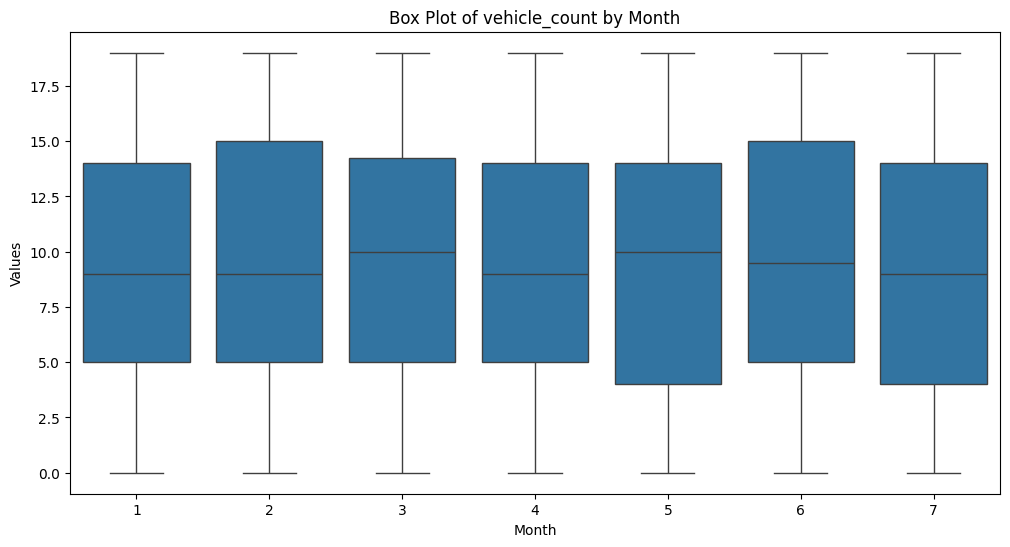

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x=cleaned_df.index.month, y=cleaned_df['vehicle_count'])
plt.title('Box Plot of vehicle_count by Month')
plt.xlabel('Month')
plt.ylabel('Values')
plt.show()

The vehicle_count column which is of interest to our project has no values that fall extremely out of range.